<a href="https://colab.research.google.com/github/vkurpmax/Machine-Learning/blob/main/Asia%20University%20Course/Final_Project_Stock_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Project use Logistic Regression to Predict Stock

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 4.0 MB 36.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf
import numpy as np

In [ ]:
df = yf.download('AAPL', start='2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df['returns'] = np.log(df.Close.pct_change() + 1)

In [ ]:
df['direction'] = [1 if i > 0 else -1 for i in df.returns]

In [ ]:
def lagit(df, lags):
  names = []
  for i in range (1, lags + 1):
    df['Lag_'+str(i)] = df['returns'].shift(i)
    df['Lag_'+str(i)+'_dir'] = [1 if j > 0 else -1 for j in df['Lag_'+str(i)]]
    names.append('Lag_'+str(i)+'_dir')
  return names

In [ ]:
dirnames = lagit(df, 5)

In [ ]:
dirnames

['Lag_1_dir', 'Lag_2_dir', 'Lag_3_dir', 'Lag_4_dir', 'Lag_5_dir']

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,direction,Lag_1,Lag_1_dir,Lag_2,Lag_2_dir,Lag_3,Lag_3_dir,Lag_4,Lag_4_dir,Lag_5,Lag_5_dir,prediction_Logit,strat_Logit
Date,,,,,,,,,,,,,,,,,,,,
2022-01-11,172.320007,175.179993,170.820007,175.080002,174.069733,76138300,0.016644,1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,-1,-0.016644
2022-01-12,176.119995,177.179993,174.820007,175.529999,174.517136,74805200,0.002567,1,0.016644,1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,-1,-0.002567
2022-01-13,175.779999,176.619995,171.789993,172.190002,171.196411,84505800,-0.019211,-1,0.002567,1,0.016644,1,NaN,-1,NaN,-1,NaN,-1,-1,0.019211
2022-01-14,171.339996,173.779999,171.089996,173.070007,172.071350,80440800,0.005098,1,-0.019211,-1,0.002567,1,0.016644,1,NaN,-1,NaN,-1,-1,-0.005098
2022-01-18,171.509995,172.539993,169.410004,169.800003,168.820206,90956700,-0.019075,-1,0.005098,1,-0.019211,-1,0.002567,1,0.016644,1,NaN,-1,1,-0.019075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-12,142.699997,144.500000,141.059998,144.490005,144.490005,70462700,0.016257,1,-0.003441,-1,0.012060,1,-0.013881,-1,-0.025697,-1,-0.008015,-1,-1,-0.016257
2022-12-13,149.500000,149.970001,144.240005,145.470001,145.470001,93886200,0.006760,1,0.016257,1,-0.003441,-1,0.012060,1,-0.013881,-1,-0.025697,-1,1,0.006760
2022-12-14,145.350006,146.660004,141.160004,143.210007,143.210007,82291200,-0.015658,-1,0.006760,1,0.016257,1,-0.003441,-1,0.012060,1,-0.013881,-1,-1,0.015658


In [ ]:
df.dropna(inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(df[dirnames], df['direction'])

LogisticRegression()

In [ ]:
df['prediction_Logit'] = model.predict(df[dirnames])

In [ ]:
df['prediction_Logit']

Date
2022-01-19   -1
2022-01-20    1
2022-01-21   -1
2022-01-24    1
2022-01-25   -1
             ..
2022-12-12   -1
2022-12-13    1
2022-12-14   -1
2022-12-15   -1
2022-12-16    1
Name: prediction_Logit, Length: 231, dtype: int64

In [ ]:
df['strat_Logit'] = df['prediction_Logit'] * df['returns']

In [ ]:
np.exp(df[['returns', 'strat_Logit']].sum())

returns        0.792167
strat_Logit    1.261170
dtype: float64

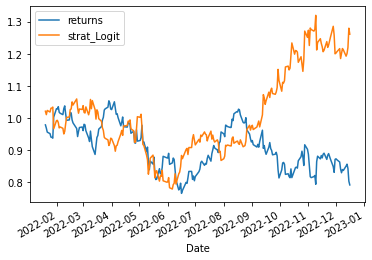

In [ ]:
np.exp(df[['returns', 'strat_Logit']].cumsum()).plot()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, shuffle=False, test_size=0.25, random_state=0)

In [ ]:
train = train.copy()

In [ ]:
test = test.copy()

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(train[dirnames], train['direction'])

LogisticRegression()

In [ ]:
test['prediction_Logit'] = model.predict(test[dirnames])

In [ ]:
test['strat_Logit'] = test['prediction_Logit'] * test['returns']

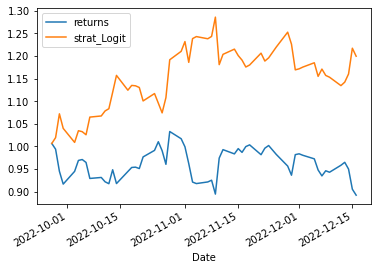

In [ ]:
np.exp(test[['returns', 'strat_Logit']].cumsum()).plot()

In [ ]:
from sklearn import metrics

In [ ]:
metrics.confusion_matrix(test['direction'], test['prediction_Logit'])

array([[21, 10],
       [14, 13]])

In [ ]:
print(metrics.classification_report(test['direction'], test['prediction_Logit']))

              precision    recall  f1-score   support

          -1       0.60      0.68      0.64        31
           1       0.57      0.48      0.52        27

    accuracy                           0.59        58
   macro avg       0.58      0.58      0.58        58
weighted avg       0.58      0.59      0.58        58

